$$\require{mhchem}$$

# Haber-Bosch (18 pt, 2 pts each section)

The Haber-Bosch process is the most widely used catalytic process in the world, and consumes something like 1-3% of all of the energy produced on Earth. This reaction is the only reason we can feed 7 billion people:
\begin{align*}
\ce{N2 + 3H2 -> 2NH3}
\end{align*}

## Calculate the gas-phase free energy of the reaction at 600 K and 1 atm, assuming standard temperature/pressure for each species using data from the NIST chemistry web book.

In [1]:
import numpy as np
R = 8.314e-3  # kJ/mol/K

# atm, this is the total pressure in the reactor
P0 = 1.0  # atm, this is the standard state pressure

Hf298 = [0.0,   # N2
         0.0,  # H2
         -45.94]   # NH3

WB = [
    [19.50583, 19.88705, -8.598535, 1.369784, 0.527601, -4.935202, 212.3900, 0], 
    [33.066178, -11.363417, 11.432816, -2.772874, -0.158558, -9.980797, 172.707974, 0.0],
    [19.99563, 49.77119 ,-15.37599,1.921168, 0.189174, -53.30667, 203.8591,-45.89806]
]
WB = np.array(WB)

@np.vectorize
def G_rxn(T, P):
    # Shomate equations
    t = T/1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                    t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K
    G = Gjo + R * T * np.log(P / P0)
    nu = np.array([-1, -3, 2])
    Grxn = np.dot(nu, G)
    return Grxn

print('Free energy of reaction = %1.1f kJ/mol at 700 K'%G_rxn(600, 1))

Free energy of reaction = 31.7 kJ/mol at 700 K


## Calculate the free energy as a function of temperature, from 400 to 800 K on a log-y plot, at 1 atm and 100 atm.

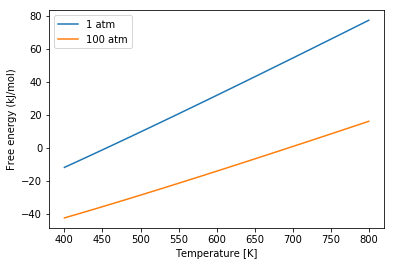

In [7]:
import matplotlib.pyplot as plt

Tspan = np.linspace(400,800)
G1 = G_rxn(Tspan,1)
plt.plot(Tspan,G1)
G2 = G_rxn(Tspan,100)
plt.plot(Tspan,G2)
plt.legend(['1 atm','100 atm'])
plt.xlabel('Temperature [K]')
plt.ylabel('Free energy (kJ/mol)')
plt.show()


## Based on the plot from 1.2, estimate an upper limit of temperature if we want this reaction to proceed reasonably to the products at 100 atm

650-700 K is a reasonably upper limit, after which the equlibrium constant is appreciably below 1 (favoring reactants).

## As the pressure is increased, why does the equilibrium conversion increase or decrease?

Increase, since there are fewer moles in the products

## For a fixed reactor (no inlet/outlet) starting with a 3:1 mixture of H2 to N2 (total 1 mol), plot the free energy of reaction as a function of reaction extent at 650K and 1 atm. Include the curve for 100 atm on the same graph.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


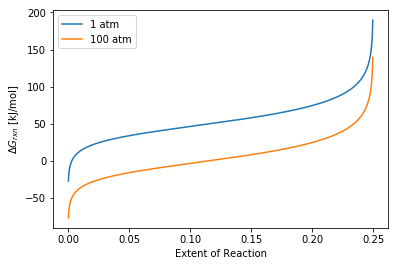

In [11]:
yN20 = 0.25
yH20 = 0.75
C0 = np.array([yN20, yH20,0])
nu = np.array([-1, -3, 2])

R = 8.314e-3   # kJ/mol/K
P0 = 1

def G_rxn(x, T, P):
    # Shomate equations
    t = T/1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                    t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K
    G = Gjo + R * T * np.log(x * P / P0)
    nu = np.array([-1, -3, 2])
    Grxn = np.dot(nu, G)
    return Grxn

@np.vectorize
def G_tot(xi,T,P):

    C = C0 + xi * nu  # change in moles from reaction extent
    x = C / C.sum()   # mole fractions

    # Species gibbs energies in mixture
    G = G_rxn(x,T,P)

    return G



plt.plot(xspan,G_tot(xspan,650, 1))
xspan = np.linspace(0,0.25,1000)
plt.plot(xspan,G_tot(xspan,650, 100))
plt.xlabel('Extent of Reaction')
plt.ylabel('$\Delta G_{rxn}$ [kJ/mol]')
plt.legend(['1 atm','100 atm'])
plt.show()

## Based on your calculations from 1.5, solve for the equilibrium extent of reaction (the extent where G_rxn=0). Hint: be careful with your initial guess, use one that is close the solution by eye from above

In [28]:
yN20 = 0.25
yH20 = 0.75
C0 = np.array([yN20, yH20,0])
nu = np.array([-1, -3, 2])

R = 8.314e-3   # kJ/mol/K
P0 = 1

def G_rxn(x, T, P):
    # Shomate equations
    t = T/1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                    t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K
    G = Gjo + R * T * np.log(x * P / P0)
    nu = np.array([-1, -3, 2])
    Grxn = np.dot(nu, G)
    return Grxn

def G_tot(xi,T,P):

    C = C0 + xi * nu  # change in moles from reaction extent
    x = C / C.sum()   # mole fractions
    # Species gibbs energies in mixture
    G = G_rxn(x,T,P)

    return G


from scipy.optimize import fsolve

xi_guess = 0.001
sol, = fsolve(G_tot, xi_guess,args=(650,100,))
print('The Gibbs free energy is minimized at xi = {0:1.4f} mol'.format(sol))

The Gibbs free energy is minimized at xi = 0.1153 mol


## Use matplotlib to make a 2d contour plot of the conversion as a function of temperature/pressure, from T=300K to 900K and P from 1 atm to 150 atm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


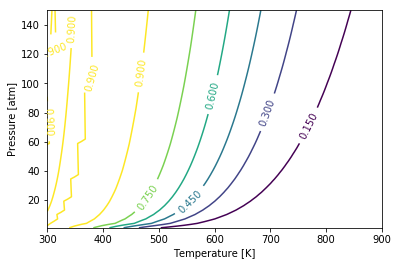

In [30]:
Tspan = np.linspace(300,900)
Pspan = np.linspace(1,150)
T, P = np.meshgrid(Tspan, Pspan)

@np.vectorize
def solve_extent(T,P):
    sol, = fsolve(G_tot, xi_guess,args=(T,P,))
    return sol

xi = solve_extent(T,P)

CS = plt.contour(Tspan,Pspan,xi/0.25)
plt.clabel(CS,inline=1, fontsize=10)
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [atm]')
plt.show()

## Say the rate constant is elementary (it's not and we'll discuss why later on, but let's pretend it is) with a rate constant $k_1=10^{-3} \exp(-103 [kJ/mol] / RT)$ [mol/L/s/atm^4] with activity in the rate law as $P_i$[atm]. Solve for the steady-state extent of reaction of a 10 m^3 CSTR reactor with gas inlet feed of 3:1 H2:N2 at 1mol/s total. Assume a pressure of 100 atm, which is about typical for industrial Haber-Bosch reactors, and a temperature of 650K.

In [18]:
def G_rxn(T):
    # Shomate equations
    t = T/1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                    t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K
    nu = np.array([-1, -3, 2])
    Grxn = np.dot(nu, Gjo)
    return Grxn


R_ = 0.082057

T = 650
P = 100
k1 = 1e-3 * np.exp(-103/R/T)
K = np.exp(-G_rxn(T)/R/T)
N0 = [.25,.75,0]
x0 = np.array([.25,.75,0])
F0 = 1 #mol/s
v0 = F0 * R_ * T / P
V = 10000
def CSTR_balance(xi, T, P):
    N = N0 + xi*nu
    v = v0*np.sum(N)/np.sum(N0)
    x = N/np.sum(N)
    Pi = P*x
    C = P / R_ / T * x
    r = k1 * (Pi[0] * Pi[1]**3 - Pi[2]**2/K)
    dNNdt = x[0]*F0 - v*C[0] + r*V*nu[0]
    return [dNNdt]
    
xi_sol = fsolve(CSTR_balance,0.1,args=(T,P))
print('Steady state textent of reaction = %1.3f mol/s'%xi_sol)


Steady state textent of reaction = 0.108 mol/s


## Plot the conversion as a function of temperature (400 to 800 K)  at 100 bar

Text(0,0.5,'Conversion')

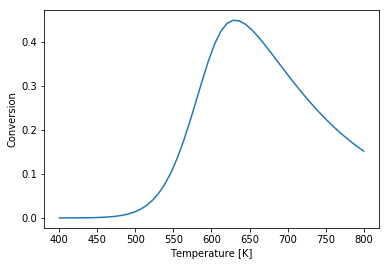

In [26]:
@np.vectorize
def solve_CSTR(T,P):
    k1 = 1e-3 * np.exp(-103/R/T)
    K = np.exp(-G_rxn(T)/R/T)
    N0 = [.25,.75,0]
    x0 = np.array([.25,.75,0])
    F0 = 1 #mol/s
    v0 = F0 * R_ * T / P
    V = 10000
    def CSTR_balance(xi, T, P):
        N = N0 + xi*nu
        v = v0*np.sum(N)/np.sum(N0)
        x = N/np.sum(N)
        Pi = P*x
        C = P / R_ / T * x
        r = k1 * (Pi[0] * Pi[1]**3 - Pi[2]**2/K)
        dNNdt = x[0]*F0 - v*C[0] + r*V*nu[0]
        return [dNNdt]

    return fsolve(CSTR_balance,0.1,args=(T,P))[0]

Tspan = np.linspace(400,800)
plt.plot(Tspan,solve_CSTR(Tspan,100)/0.25)
plt.xlabel('Temperature [K]')
plt.ylabel('Conversion')

## Discuss why there is an optimum in this case.

There are two competing effects - kinetics, which increases rate with temperature, and equilibrium, which decreases with temperature for this reaction. The optimum is where kinetics are reasonably fast but not so high temperature that the equilibrium extent of reaction is low.

## Find the optimal temperature for this reactor for maximum conversion.

In [169]:
from scipy.optimize import minimize
def solve_CSTR(T,P):
    T, = T
    k1 = 1e-3 * np.exp(-103/8.314e-3/T)
    K = np.exp(-G_rxn(T)/R/T)
    N0 = [.25,.75,0]
    x0 = np.array([.25,.75,0])
    F0 = 1 #mol/s
    v0 = F0 * R_ * T / P
    V = 10000
    def CSTR_balance(xi, T, P):
        N = N0 + xi*nu
        v = v0*np.sum(N)/np.sum(N0)
        x = N/np.sum(N)
        Pi = P*x
        C = P / R_ / T * x
        r = k1 * (Pi[0] * Pi[1]**3 - Pi[2]**2/K)
        dNNdt = x[0]*F0 - v*C[0] + r*V*nu[0]
        return [dNNdt]

    return -fsolve(CSTR_balance,0.1,args=(T,P))[0]

T_opt = minimize(solve_CSTR,450,args=(100,))

print('Optimal Temperature is %1.4f K'%T_opt['x'])

Optimal Temperature is 631.0092 K


# Reaction engineering questions (2 pt)

Ask one question on piazza.  Post the link here (for example, https://piazza.com/class/jl5aabbtksz62s?cid=190).

## Bonus (1pt)

Answer someone else's question on Piazza. Post the link here.